In [102]:
# all library we need for this task
import numpy as np
import urllib.request
import scipy.optimize
import random
import matplotlib.pyplot as plt

In [103]:
#load data from website
def parseData(fname):
    for l in urllib.request.urlopen(fname):
        yield eval(l)

In [104]:
#store data to local variable
print ("Reading data.....")
data = list(parseData("http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"))
print ("We are done")

Reading data.....
We are done


In [105]:
#init one dict for storing review/taste
TasteValue = {}
taste = [d['review/taste'] for d in data]

In [106]:
for elem in taste:
    if elem not in TasteValue.keys():
        TasteValue[elem] = 1
    else:
        TasteValue[elem] = TasteValue[elem] + 1

In [107]:
# here we get the distribution of review/taste
print (TasteValue)

{1.5: 343, 3.0: 4137, 4.5: 12883, 3.5: 8797, 4.0: 16575, 2.0: 1099, 5.0: 4331, 2.5: 1624, 1.0: 211}


In [108]:
SortedTasteValue = {key:TasteValue[key] for key in sorted(TasteValue.keys())}

In [109]:
print (SortedTasteValue)

{1.0: 211, 1.5: 343, 2.0: 1099, 2.5: 1624, 3.0: 4137, 3.5: 8797, 4.0: 16575, 4.5: 12883, 5.0: 4331}


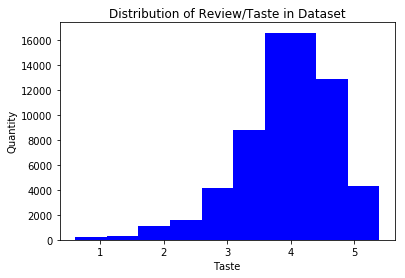

In [110]:
x = [elem for elem in SortedTasteValue.keys()]
y = [elem for elem in SortedTasteValue.values()]
plt.bar(x,y,color='blue')
plt.title('Distribution of Review/Taste in Dataset')
plt.xlabel('Taste')
plt.ylabel('Quantity')
plt.show()

In [111]:
# we need to construct the input matrix and output matrix
# unit[1] = 1 denotes the beer is Hefeweizen
def construct(data, input_x, output_y):
    unit_x = [1]
    # init theta 0
    for elem in data:
        if elem['beer/style'] == 'Hefeweizen':
            unit_x.append(1)
        else:
            unit_x.append(0)
        unit_x.append(elem['beer/ABV'])
        input_x.append(unit_x)
        output_y.append(elem['review/taste'])
        unit_x = [1]

In [112]:
input_x = []
output_y = []
construct(data, input_x, output_y)

In [113]:
theta,residuals,rank,s = np.linalg.lstsq(input_x, output_y, rcond=None)

In [114]:
print (theta)

[ 3.11795084 -0.05637406  0.10877902]


In [115]:
#split the data into two equal farctions
train_data = data[:int(len(data)/2)]
test_data = data[-int(len(data)/2):]

In [116]:
# train the model on train_data only
input_train = []
output_train = []
construct(train_data, input_train, output_train)
theta_train, residuals, rank, s = np.linalg.lstsq(input_train, output_train, rcond=None)

In [117]:
print (theta_train)

[ 2.99691466 -0.03573098  0.11672256]


In [118]:
# construct data for test dataset
input_test = []
output_test = []
construct(test_data, input_test, output_test)

In [119]:
# we have already got the model, now we need to calculate the MSE on training set
MSE_train = ((np.dot(np.array(input_train), np.array(theta_train).T) - np.array(output_train))**2).mean()
MSE_test =  ((np.dot(np.array(input_test), np.array(theta_train).T) - np.array(output_test))**2).mean()

In [87]:
# print (MSE_train-np.array(output_train))

[ 2.04479649  0.72059454  0.75561131 ... -0.23271644 -0.73271644
 -0.73271644]


In [120]:
# Here we output the MSE value for train data and test data
print ("MSE on train data: %f"%(MSE_train))
print ("MSE on test data: %f"%(MSE_test))

MSE on train data: 0.483968
MSE on test data: 0.423707


In [121]:
# We need to shuffle the data
random.shuffle(data)

In [122]:
# Then train model just as we did before
train_data_shuffled = data[:int(len(data)/2)]
test_data_shuffled = data[-int(len(data)/2):]

In [123]:
# input train feature
input_train_shuffled = []
output_train_shuffled = []
construct(train_data_shuffled, input_train_shuffled, output_train_shuffled)
# input test feature
input_test_shuffled = []
output_test_shuffled = []
construct(test_data_shuffled, input_test_shuffled, output_test_shuffled)

In [124]:
# train model
theta_train_shuffled,residuals,rank,s = np.linalg.lstsq(input_train_shuffled, output_train_shuffled, rcond=None)

In [126]:
print (theta_train_shuffled)

[ 3.11336703 -0.0449949   0.10947105]


In [127]:
# Here we again calculate MSE on train set and test set
MSE_train_shuffled = ((np.dot(np.array(input_train_shuffled), np.array(theta_train_shuffled).T) - np.array(output_train_shuffled))**2).mean()
MSE_test_shuffled =  ((np.dot(np.array(input_test_shuffled), np.array(theta_train_shuffled).T) - np.array(output_test_shuffled))**2).mean()

In [128]:
# Here we output the MSE value for train shuffled data and test shuffled data
print ("MSE on train shuffled data: %f"%(MSE_train_shuffled))
print ("MSE on test shuffled data: %f"%(MSE_test_shuffled))

MSE on train shuffled data: 0.448804
MSE on test shuffled data: 0.450521


In [129]:
def construct_newfeature(data, input_x, output_y):
    unit_x = [1]
    # init theta 0
    for elem in data:
        if elem['beer/style'] == 'Hefeweizen':
            unit_x.append(elem['beer/ABV'])
            unit_x.append(0)
        else:
            unit_x.append(0)
            unit_x.append(elem['beer/ABV'])
        input_x.append(unit_x)
        output_y.append(elem['review/taste'])
        unit_x = [1]

In [130]:
# reconstruct features using new method
# input train feature
new_input_train_shuffled = []
new_output_train_shuffled = []
construct_newfeature(train_data_shuffled, new_input_train_shuffled, new_output_train_shuffled)
# input test feature
new_input_test_shuffled = []
new_output_test_shuffled = []
construct_newfeature(test_data_shuffled, new_input_test_shuffled, new_output_test_shuffled)

In [131]:
# train new model
new_theta_train_shuffled,residuals,rank,s = np.linalg.lstsq(new_input_train_shuffled, new_output_train_shuffled, rcond=None)

In [132]:
# print the theta under this case
print (new_theta_train_shuffled)

[3.11370652 0.09945572 0.10943807]


In [133]:
# Here we again calculate MSE on train set and test set base on new feature
new_MSE_train_shuffled = ((np.dot(np.array(new_input_train_shuffled), np.array(new_theta_train_shuffled).T) - np.array(new_output_train_shuffled))**2).mean()
new_MSE_test_shuffled =  ((np.dot(np.array(new_input_test_shuffled), np.array(new_theta_train_shuffled).T) - np.array(new_output_test_shuffled))**2).mean()

In [134]:
# Here we output the MSE value for train shuffled data and test shuffled data
print ("MSE on train shuffled data: %f"%(new_MSE_train_shuffled))
print ("MSE on test shuffled data: %f"%(new_MSE_test_shuffled))

MSE on train shuffled data: 0.448795
MSE on test shuffled data: 0.450518
